In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import statsmodels.api as sm
from scipy.stats import f_oneway
import math
from scipy.stats import chi2_contingency


In [2]:
df = pd.read_excel(r'C:\Master Biosciences\Semester 5 Thesis\Demographics_Maria_Rishiedit.xlsx')
matchedtable = pd.read_csv(r'MatchedTable_NWref.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Master Biosciences\\Semester 5 Thesis\\Demographics_Maria_Rishiedit.xlsx'

In [ ]:
df.columns

In [43]:
df.dtypes

Participant_ID                        int64
Complete                              int64
Excluded                              int64
Behavioural Only                      int64
Group                                 int64
Age                                 float64
Gender                                int64
BMI                                  object
Any_comorbidity                       int64
Any_psych_meds                        int64
Trailmaking Part B                   object
Digit Span backward level           float64
DSST                                float64
Wortschatztest IQ                   float64
EDE-Q_mean total                    float64
EDE-Q_binge_episodes                float64
BIS 15                              float64
UPPS_score urgency                  float64
UPPS_score lack of premeditation    float64
UPPS_score lack of perseverance     float64
UPPS_score sensation seeking        float64
mYFAS2_score                        float64
FCQ_total                       

In [68]:
pd.unique(df['Excluded'])

array([ 1,  0, 99], dtype=int64)

In [259]:
#df.loc[df['Excluded'] == 99, 'Excluded'] = 0


In [69]:
df.columns = df.columns.str.strip()	#remove whitespaces in the columns so to avoid getting key errors when calling the columns



In [70]:
uniqueids = pd.unique(matchedtable['Participant_ID'])
df = df[df['Participant_ID'].isin(uniqueids)] #filter out only the matched participants
#Insert a Group_ID column for easier filteration for later and our ANOVAs
df.insert(1,'Group_ID',0)


In [71]:
pd.unique(matchedtable['Participant_ID'][matchedtable['Group_ID']=='NW'])

array([102, 104, 105, 106, 107, 108, 109, 110, 111, 155, 113, 114, 145,
       116, 117, 119, 153, 121, 122, 124, 146, 125, 126, 127, 128, 130,
       131, 132, 133, 166, 134, 135, 151, 136, 137, 138, 139, 140, 156,
       144, 168, 162, 164, 149, 159, 150, 157], dtype=int64)

In [74]:
#Assign group IDs based off participant number
df.loc[df['Participant_ID'] <200, 'Group_ID'] = 'NW'
df.loc[(df['Participant_ID'] >200) & (df['Participant_ID'] < 400), 'Group_ID'] = 'BED'
df.loc[df['Participant_ID'] > 400, 'Group_ID'] = 'OB'



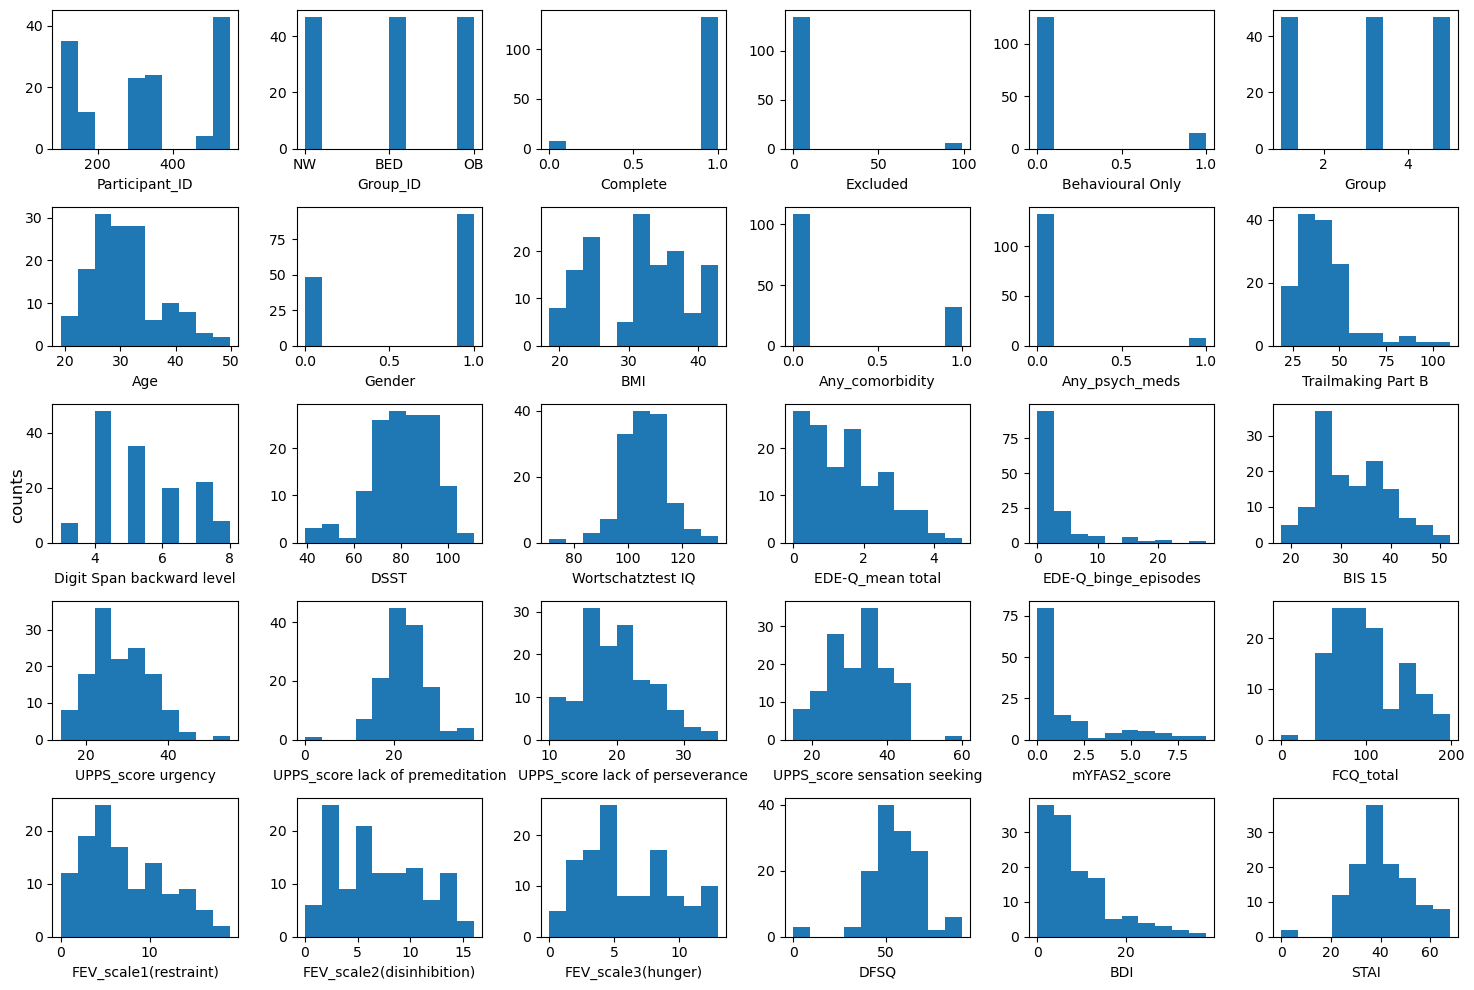

In [75]:
nplots = df.shape[1] #get the number of columns
cols = math.ceil(math.sqrt(nplots))
rows = math.ceil(nplots/cols)
fig, axes = plt.subplots(rows,cols, figsize = (15,10))
axes = axes.flatten() #flattening the axes makes it easier to directly plot the 30 columns

for i,column in enumerate(df.columns): #i for index, column for name of column
    axes[i].hist(df[column])
    axes[i].set_xlabel(column)
    
fig.supylabel('counts')
plt.tight_layout()

In [76]:
df.isna().any()

Participant_ID                      False
Group_ID                            False
Complete                            False
Excluded                            False
Behavioural Only                    False
Group                               False
Age                                 False
Gender                              False
BMI                                 False
Any_comorbidity                     False
Any_psych_meds                      False
Trailmaking Part B                  False
Digit Span backward level            True
DSST                                False
Wortschatztest IQ                   False
EDE-Q_mean total                     True
EDE-Q_binge_episodes                 True
BIS 15                               True
UPPS_score urgency                   True
UPPS_score lack of premeditation     True
UPPS_score lack of perseverance      True
UPPS_score sensation seeking         True
mYFAS2_score                         True
FCQ_total                         

In [77]:
df[df.isna().any(axis=1)]


,Participant_ID,Group_ID,Complete,Excluded,Behavioural Only,Group,Age,Gender,BMI,Any_comorbidity,...,UPPS_score lack of perseverance,UPPS_score sensation seeking,mYFAS2_score,FCQ_total,FEV_scale1(restraint),FEV_scale2(disinhibition),FEV_scale3(hunger),DFSQ,BDI,STAI
34,135,NW,1,0,0,1,30.000000,1,21.54,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
60,162,NW,1,0,0,1,29.000000,0,23.49,0,...,15.0,27.0,0.0,45.0,4.0,0.0,4.0,47.0,4.0,NaN
62,164,NW,1,0,0,1,33.083333,0,23.06,0,...,13.0,37.0,0.0,63.0,7.0,1.0,1.0,33.0,0.0,NaN
64,166,NW,1,0,0,1,20.833333,0,25.16,0,...,16.0,41.0,0.0,46.0,2.0,2.0,2.0,86.0,0.0,NaN
112,304,BED,1,0,0,3,27.166667,1,35.02,1,...,26.0,35.0,2.0,162.0,NaN,NaN,NaN,49.0,9.0,59.0
113,305,BED,0,99,0,3,27.750000,0,35.9,0,...,26.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,306,BED,1,0,0,3,27.916667,1,40.9,0,...,19.0,38.0,1.0,126.0,NaN,NaN,NaN,48.0,14.0,45.0
115,307,BED,1,0,0,3,32.083333,0,33.7,0,...,25.0,34.0,0.0,113.0,NaN,NaN,NaN,56.0,7.0,46.0
116,308,BED,1,0,0,3,28.333333,1,36.02,1,...,25.0,41.0,6.0,157.0,NaN,NaN,NaN,68.0,17.0,45.0
117,309,BED,1,0,0,3,31.166667,1,36.25,1,...,NaN,NaN,1.0,126.0,NaN,NaN,NaN,57.0,8.0,47.0


In [78]:
#get the summary data for all the columns per group
def summarize(Demographics):
    colstodrop = ['Participant_ID','Group','Complete','Excluded','Behavioural Only']
    Demographics = Demographics.drop(colstodrop,axis=1) #drop these columns, because we dont need the summary data for them
    colssummary = Demographics.columns.tolist() #list of columns for which we need our summary data

    BEDsum = {} #empty dictionary to hold all the summary values for each group
    NWsum = {}
    OBsum = {}
    Demographics.dropna()
    for column in colssummary:
        if column == 'Group_ID': #skipping the Group_ID column
            continue
        else:
        #setting a conditional here to check if the column contains continous or binary data
            unique = pd.unique(Demographics[column]) #get unique values of the column
            binary = set(unique).issubset({0,1}) #make a boolean to identify binary data 
            if binary == True: #if the column does contain binary data
                #we then summarize the data into percentages per group
                summarydata = Demographics.groupby('Group_ID')[column].value_counts(normalize = True)*100
                BEDsum[column] = f'{summarydata[0]:.2f}%' #round percentages to 2 decimal places
                NWsum[column] = f'{summarydata[1]:.2f}%'
                OBsum[column] = f'{summarydata[2]:.2f}%'

            else:
                #else we just get the mean per group
                summarydata = Demographics.groupby('Group_ID')[column].agg(['mean','std']) #this returns a dataframe
                #iloc pulls the row we want from the Dataframe, BED is row 1, NW is row 2, OB is row 3
                # mean values are in the first column, so column = 0, std values are in the second column, column = 1
                #store the values as an formatted string to 2 decimal places
                BEDsum[column] = f'{summarydata.iloc[0][0]:.2f} ± {summarydata.iloc[0][1]:.2f}' 
                NWsum[column] = f'{summarydata.iloc[1][0]:.2f} ± {summarydata.iloc[1][1]:.2f}'
                OBsum[column] = f'{summarydata.iloc[2][0]:.2f} ± {summarydata.iloc[2][1]:.2f}'

    #individual dictionaries can be called out by indexing the result
    #BEDsum is the first element, NWsum is the second and so on..
    return NWsum, BEDsum, OBsum     




In [79]:
#finding the total nans in each column
columns = df.columns.tolist()
nacounts = {}
for i in columns:
    
    countnw = df[i][df['Group_ID'] == 'NW'].isna().sum().sum()
    countbed= df[i][df['Group_ID'] == 'BED'].isna().sum().sum()
    countob = df[i][df['Group_ID'] == 'OB'].isna().sum().sum()
    
    nacounts[i] = f' NW : {countnw}, BED: {countbed}, OB: {countob}'

nacounts

{'Participant_ID': ' NW : 0, BED: 0, OB: 0',
 'Group_ID': ' NW : 0, BED: 0, OB: 0',
 'Complete': ' NW : 0, BED: 0, OB: 0',
 'Excluded': ' NW : 0, BED: 0, OB: 0',
 'Behavioural Only': ' NW : 0, BED: 0, OB: 0',
 'Group': ' NW : 0, BED: 0, OB: 0',
 'Age': ' NW : 0, BED: 0, OB: 0',
 'Gender': ' NW : 0, BED: 0, OB: 0',
 'BMI': ' NW : 0, BED: 0, OB: 0',
 'Any_comorbidity': ' NW : 0, BED: 0, OB: 0',
 'Any_psych_meds': ' NW : 0, BED: 0, OB: 0',
 'Trailmaking Part B': ' NW : 0, BED: 0, OB: 0',
 'Digit Span backward level': ' NW : 0, BED: 1, OB: 0',
 'DSST': ' NW : 0, BED: 0, OB: 0',
 'Wortschatztest IQ': ' NW : 0, BED: 0, OB: 0',
 'EDE-Q_mean total': ' NW : 1, BED: 1, OB: 2',
 'EDE-Q_binge_episodes': ' NW : 1, BED: 1, OB: 2',
 'BIS 15': ' NW : 1, BED: 1, OB: 0',
 'UPPS_score urgency': ' NW : 1, BED: 1, OB: 1',
 'UPPS_score lack of premeditation': ' NW : 1, BED: 1, OB: 1',
 'UPPS_score lack of perseverance': ' NW : 1, BED: 1, OB: 1',
 'UPPS_score sensation seeking': ' NW : 1, BED: 1, OB: 1',
 'm

In [80]:
#test code
todrop = df[df['DFSQ'].isna()]
todrop

,Participant_ID,Group_ID,Complete,Excluded,Behavioural Only,Group,Age,Gender,BMI,Any_comorbidity,...,UPPS_score lack of perseverance,UPPS_score sensation seeking,mYFAS2_score,FCQ_total,FEV_scale1(restraint),FEV_scale2(disinhibition),FEV_scale3(hunger),DFSQ,BDI,STAI
34,135,NW,1,0,0,1,30.000000,1,21.54,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
113,305,BED,0,99,0,3,27.750000,0,35.9,0,...,26.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,315,BED,0,99,0,3,33.750000,0,33.07,1,...,13.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,322,BED,0,99,0,3,31.392800,0,38.57,0,...,21.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,323,BED,1,0,1,3,21.166667,1,40.58,0,...,27.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,328,BED,0,99,0,3,31.166667,1,36.44,1,...,17.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,335,BED,1,0,0,3,33.416667,1,33.62,0,...,25.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,338,BED,0,0,1,3,33.916667,1,40.46,1,...,26.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,543,OB,0,0,0,5,44.666667,0,41,0,...,22.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:

def DoAnova(Demographics):
    colstodrop = ['Participant_ID','Group','Complete','Excluded','Behavioural Only']
    Demographics = Demographics.drop(colstodrop,axis=1) #drop these columns, because we dont need the summary data for them
    colssummary = Demographics.columns.tolist() #list of columns for which we need our summary data
    
    testvals = {}
    pvals = {}
    testinfo = []
    samplesize_tests = {}

    for column in colssummary:
        if column == 'Group_ID': #skipping the Group_ID column
            continue
            
        else:
            unique = pd.unique(Demographics[column]) #get unique values of the column
            binary = set(unique).issubset({0,1}) #make a boolean to identify binary data 
       
            
            if binary == True: #if the column does contain binary data
                contingency_table = pd.crosstab(Demographics['Group_ID'],Demographics[column])
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                
                testvals[column] = round(chi2,3)
                pvals[column] = round(p,3)
                testinfo.append('Chi Squared')
                #update the sample sizes which went into the test
                data_todrop = Demographics[['Group_ID',column]] #making a subset of the dataframe with just group_ID and chosen column
                cleaned_data = data_todrop.dropna(subset=[column]) #drop Nans anywhere along this column
                NWdata = cleaned_data[column][Demographics['Group_ID'] == 'NW']
                BEDdata = cleaned_data[column][Demographics['Group_ID'] == 'BED']
                OBdata = cleaned_data[column][Demographics['Group_ID'] == 'OB']
                samplesize_tests[column] = f'{len(NWdata)}, {len(BEDdata)}, {len(OBdata)}'
                
                
                
               
            else:
                data_todrop = Demographics[['Group_ID',column]] #making a subset of the dataframe with just group_ID and chosen column
                cleaned_data = data_todrop.dropna(subset=[column]) #drop Nans anywhere along this column
                NWdata = cleaned_data[column][Demographics['Group_ID'] == 'NW']
                BEDdata = cleaned_data[column][Demographics['Group_ID'] == 'BED']
                OBdata = cleaned_data[column][Demographics['Group_ID'] == 'OB']
                
                if column == 'BMI': #if it is BMI just do the anova between BED and OB
                    fval, pval = f_oneway(BEDdata,OBdata)
                    testvals[column] = round(fval,3)
                    pvals[column] = round(pval,3)
                    testinfo.append('ANOVA')
                    samplesize_tests[column] = f'{len(NWdata)}, {len(BEDdata)}, {len(OBdata)}' #update the sample sizes which went into the test
                
                else:
                    fval, pval = f_oneway(NWdata,BEDdata,OBdata)

                    testvals[column] = round(fval,3)
                    pvals[column] = round(pval,3)
                    testinfo.append('ANOVA')
                    samplesize_tests[column] = f'{len(NWdata)}, {len(BEDdata)}, {len(OBdata)}'



    
    return testvals, pvals,testinfo,samplesize_tests

    
    
    
    
    

In [59]:
pd.crosstab(df['Group_ID'],df['Any_comorbidity']) #function to count occurences per group

Any_comorbidity,0,1
Group_ID,,
0,109,32


In [82]:
#get the summary results
result = summarize(df)
anovaresult = DoAnova(df)

#drop the following columns before you add the rows to your summary table
colstodrop = ['Participant_ID','Group_ID','Group','Complete','Excluded','Behavioural Only']
#rename the columns to keep the table cleaner
df = df.rename(columns={'Any_comorbidity': 'Any Comorbidity',
                 'Any_psych_meds': 'Psychiatric Medication',
                  'EDE-Q_mean total': 'EDE-Q Mean Total',
                  'EDE-Q_binge_episodes': 'EDE-Q Binge Episodes',
                 'UPPS_score urgency': 'UPPS Urgency',
                 'UPPS_score lack of premeditation': 'UPPS Premeditation',
                'UPPS_score lack of perseverance':'UPPS Perseverance', 
                   'UPPS_score sensation seeking': 'UPPS Sensation Seeking',
                   'mYFAS2_score' : 'mYFAS2', 'FCQ_total': 'FCQ',
                   'FEV_scale1(restraint)': 'FEV Scale 1 Restraint',
                   'FEV_scale2(disinhibition)': 'FEV Scale 2 Disinhibition',
                   'FEV_scale3(hunger)': 'FEV Scale 3 Hunger'})

##remove all underscores from column names and convert all the original demographics table columns into rows
#so basically these functions are chained in one line : df.drop drops the columns we want to remove, 
#.columns gets all the existing columns, #.tolist() turns all the existing columns into a list
democolumns = df.drop(colstodrop,axis=1).columns.tolist()

#make the summary table
summarytable = pd.DataFrame({
    '' : democolumns, #we take all existing columns and make them into rows
    'NW': [value for key,value in result[0].items()] ,
    'BED': [value for key,value in result[1].items()],
    'OB' : [value for key,value in result[2].items()],
    'Statistical Test': anovaresult[2],
    'Test Statistic': [value for key,value in anovaresult[0].items()],
    'p-Value': ["<0.01" if value <= 0 else value for key, value in anovaresult[1].items()],
    'Sample Size (NW,BED,OB)' : [value for key,value in anovaresult[3].items()]
    
    
})
summarytable

,,NW,BED,OB,Statistical Test,Test Statistic,p-Value,"Sample Size (NW,BED,OB)"
0,Age,29.95 ± 5.98,31.18 ± 6.04,31.45 ± 6.15,ANOVA,0.819,0.443,"47, 47, 47"
1,Gender,34.04%,65.96%,65.96%,Chi Squared,0.000,1.0,"47, 47, 47"
2,BMI,23.04 ± 1.75,36.14 ± 3.96,34.92 ± 3.54,ANOVA,2.471,0.119,"47, 47, 47"
3,Any Comorbidity,48.94%,51.06%,95.74%,Chi Squared,29.186,<0.01,"47, 47, 47"
4,Psychiatric Medication,14.89%,85.11%,100.00%,Chi Squared,11.397,0.003,"47, 47, 47"
5,Trailmaking Part B,40.31 ± 10.22,43.86 ± 18.20,40.38 ± 14.09,ANOVA,0.920,0.401,"47, 47, 47"
6,Digit Span backward level,5.47 ± 1.40,5.02 ± 1.16,5.06 ± 1.44,ANOVA,1.586,0.209,"47, 46, 47"
7,DSST,83.96 ± 10.80,76.89 ± 14.07,80.62 ± 14.34,ANOVA,3.384,0.037,"47, 47, 47"
8,Wortschatztest IQ,109.47 ± 8.29,104.09 ± 7.22,105.74 ± 9.86,ANOVA,4.917,0.009,"47, 47, 47"
9,EDE-Q Mean Total,0.61 ± 0.54,2.57 ± 0.84,1.37 ± 0.81,ANOVA,81.088,<0.01,"46, 46, 45"


In [83]:
summarytable.to_excel('Demographics Summary.xlsx')